# Simple SCAM Cases Comparison Plotting Scripts

In [214]:
import matplotlib.pyplot as mp
from matplotlib import gridspec
import numpy as np
import pandas as pd
import cftime as cft

import datetime as dt
import metpy.calc as mpy
from metpy.units import units
import metpy.constants as mconst

import xarray as xr
from pylab import *

In [215]:
## Constants ##
cp_air = mconst.dry_air_spec_heat_press.magnitude # Specific heat for dry air

## SIMPLE PLOTS ##

pdir = "/Users/rneale/nc_files/"
odir = "/Users/rneale/nc_files/iops/"
fig_dir = "/Users/rneale/Documents/NCAR/PBL/PBL_py_data/png_qlook"

#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100a','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101a']
#cnames = ['CAM6','CAM6-noconv','CAM5','CAM5-noconv']


fig_pref = 'zm_ke'


#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100b','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101b']
#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.002','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L32','FSCAM.T42_T42.togaII.001.L256']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=3)','CAM6 (#CIN=5)','CAM6 (L32)','CAM6 (L256)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L256','FSCAM.T42_T42.togaII.001.L256.nolev1zm']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=5)','CAM6 (L256)','CAM6 (L256-nolev1zm)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L64','FSCAM.T42_T42.arm97.001','FSCAM.T42_T42.arm97.001.L64']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=5)','CAM6 (L64,#CIN=1)','CAM6 (ARM97)','CAM6 (ARM97, L64)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.001.org00']
#cnames = ['CAM6','CAM6 (zm_org)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.001.sflux01','FSCAM.T42_T42.togaII.001.L256','FSCAM.T42_T42.togaII.001.L256.sflux01','FSCAM.T42_T42.togaII.001.sflux2']
#cnames = ['CAM6','CAM6 (5m ref.)','CAM6 (L256)','CAM6 (L256, 5m ref.)','CAM6 (Zheng scheme)']

cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke001']
cnames = ['CAM6','CAM6-KE.ZM']

#cases = ['FSCAM.T42_T42.rico.000','FSCAM.T42_T42.rico.000']
#cnames = ['CAM6','CAM6']

# Plots variable
ldiff_plot = False

#vname = 'RELHUM'   ; vscale = 1. ; units='%' ; cmin = 50 ; cmax = 120. ; cmap = 'YlGnBu'
#vname = 'Q'   ; vscale = 1000. ; units='g/kg' ; cmin = 0 ; cmax = 30. ; cmap = 'YlGnBu'
#vname = 'T'   ; vscale = 1.  ; units='K' ; cmin = 200 ; cmax = 300. ; cmap = 'RdBu_r'
#vname = 'ZMBUOY' ; vscale = 1. ; units='K' ; cmin = -5 ; cmax = 5. ; cmap = 'RdBu_r'
#vname = 'CLOUD' ; vscale = 100. ; units='%' ; cmin = 0 ; cmax = 100. ; cmap = 'Purples'
#vname = 'CONCLD' ; vscale = 100. ; units='%' ; cmin = 0 ; cmax = 50. ; cmap = 'Purples'
#vname = 'CLDICE'   ; vscale = 1000.
#vname = 'CLDLIQ' ; vscale = 1000.
#vname = 'CLDLIQZM' ; vscale = 1000.
#vname = 'DLFZM' ; vscale = 1000.
#vname = 'QRS' ; vscale = 86400.
#vname = 'ZMDQ'   ; vscale = 1000.*86400. ; units='g/kg/day' ; cmin = -5 ; cmax = 5. ; cmap = 'RdBu_r'
vname = 'ZMDT'   ; vscale = 86400. ; units='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'
#vname = 'DLF'   ; vscale = 1000.*86400. ; units='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'
#vname = 'STEND_CLUBB'   ; vscale = 86400./cp_air ; units='K/day' ; cmin = -40 ; cmax = 40. ; cmap = 'RdBu_r'

#vname = 'DCQ'   ; vscale = 1000.*86400. ; units='g/kg/day' ; cmin = -8 ; cmax = 8. ; cmap = 'RdBu_r'
#vname = 'DTCOND' ; vscale = 86400. ; units='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'

#vname = 'ZMMU' ; vscale = 3600. ; units='kg/m^2/hr' ; cmin = 0 ; cmax = 100. ; cmap = 'PuBuGn'
#vname = 'ZMMD' ; vscale = 3600. ; units='kg/m^2/hr' ; cmin = -20 ; cmax = 5. ; cmap = 'PuBuGn_r'

###### 1D fields ######

#vname1d = 'SHFLX' ; vscale1d = 1. ; units='W/m^2' ; pmin = 0. ; pmax= 20.
#vname1d = 'LHFLX' ; vscale1d = 1. ;  units='W/m^2' ; pmin = 0. ; pmax= 200.
#vname1d = 'U10' ; vscale1d = 1. ;  units='m/s' ; pmin = 0. ; pmax= 10.
#vname1d = 'TAUX' ; vscale1d = 1. ;  units='kg/m^2/s' ; pmin = -0.2 ; pmax= 0.0
#vname1d = 'ZBOT' ; vscale1d = 1. ;  units='m' ; pmin = 0. ; pmax= 150.
vname1d = 'PRECT' ; vscale1d = 86400.*1000. ;  units='mm/day' ; pmin = 0. ; pmax= 15. ; ovar='Prec' ; oscale = 86400.

#vname1d = 'CLDLOW' ; vscale1d = 1.

File read in -> FSCAM.T42_T42.arm97.zm.ke000
File read in -> FSCAM.T42_T42.arm97.zm.ke001


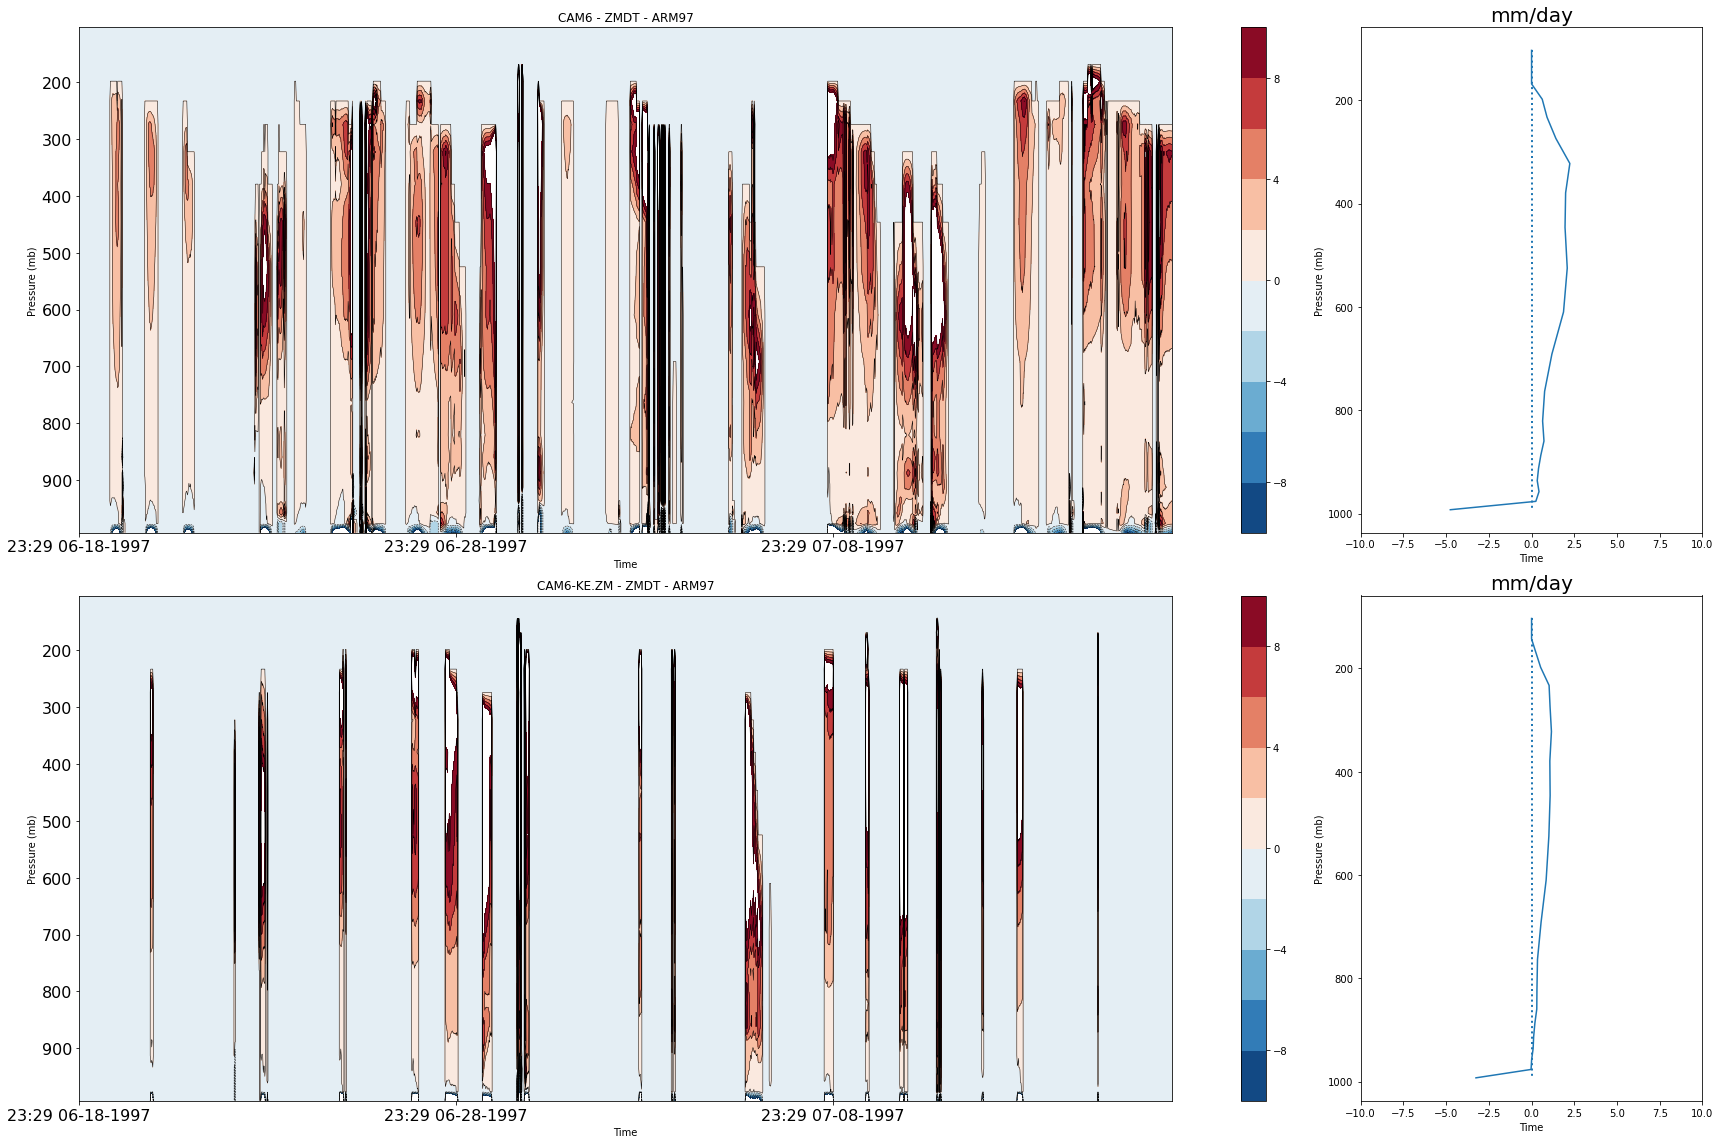

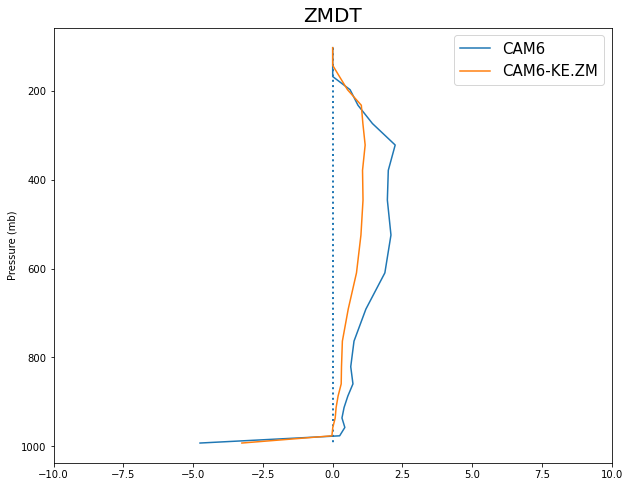

<xarray.DataArray 'year' (time: 2089)>
array([1997., 1997., 1997., ..., 1997., 1997., 1997.], dtype=float32)
Coordinates:
  * time     (time) float64 1.997e+07 1.997e+07 ... 1.997e+07 1.997e+07
Attributes:
    long_name:  Year
    units:      na


TypeError: only size-1 arrays can be converted to Python scalars

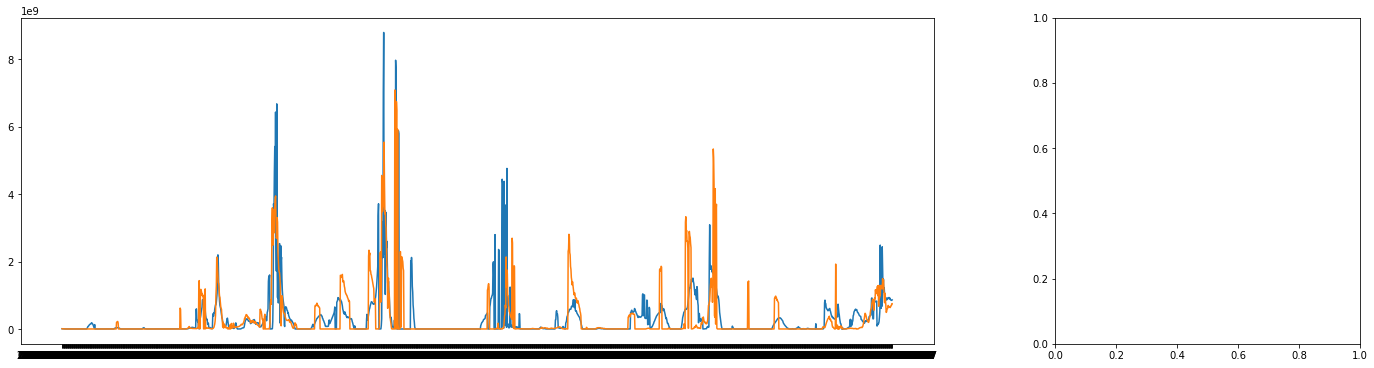

In [216]:
pntspan = 72*10 # Ntimes to span for reasonble tick spacing



ncases = len(cases)

## Some plot controls ##

#mp.rcParams['savefig.facecolor'] = 'white'
plt1, ax1 = plt.subplots(ncases,2, figsize=(24,16), gridspec_kw={'width_ratios': [4, 1]})  


for ic in range(0,len(cnames)):
    
    if cases[ic].find('togaII')!=-1 : csuf =  '.cam.h0.1992-12-18-64800.nc' ; iop = 'TOGAII' 
    if cases[ic].find('arm97')!=-1 : csuf =  '.cam.h0.1997-06-18-84585.nc' ; iop = 'ARM97'
    if cases[ic].find('rico')!=-1 : csuf =  '.cam.h0.1995-07-15-00000.nc' ; iop = 'rico' 
    
    scam_in = xr.open_dataset(pdir+cases[ic]+csuf)
    print('File read in -> '+cases[ic])

    pvar = scam_in[vname].isel(lat=0,lon=0)
    pvar = pvar.loc[:,100:]
    
    pvar = pvar.transpose()*vscale
    
    dlev = (cmax-cmin)/10

    if ic == 0: plevels = np.arange(cmin,cmax+dlev,dlev,dtype=np.float)
#    plevels = [0.1,0.3,0.4,0.5,0.75,1,2,3,4,5,8,10,15,20,25,30]

### Time zxes lebeling from (annoying) xarray cftime format
    tdate = pvar.time.dt.strftime("%H:%M %m-%d-%Y") # Works for time axis and labeling

    
    
###########################    
## Timseries Height Plot ##
###########################
    plt1 = ax1[ic,0].contourf(tdate,pvar.lev,pvar,levels=plevels,cmap=cmap) 
    mp.colorbar(plt1,ax=ax1[ic,0])
    plt1 = ax1[ic,0].contour(tdate,pvar.lev,pvar,levels=plevels,colors='black',linewidths=0.5) 
#    ax1[ic,0] = mp.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
    ax1[ic,0].set_title(cnames[ic],fontsize=29)
    ax1[ic,0].set_ylabel('Pressure (mb)') 
    ax1[ic,0].set_xlabel("Time")
    for label in (ax1[ic,0].get_xticklabels() + ax1[ic,0].get_yticklabels()):
        label.set_fontsize(16)
    ax1[ic,0].set_xticks(np.arange(0, len(tdate)+1, pntspan))
    ax1[ic,0].invert_yaxis()  
    ax1[ic,0].set_title(cnames[ic]+' - '+vname+' - '+iop)
    mp.tight_layout()
    
    
    
## Average Plot ##
    pvarm = pvar.mean(axis=1)
    
# Gather 1d timeseries variables
    if vname1d != 'PRECT' : pvar1d = vscale1d*scam_in[vname1d]
    if vname1d == 'PRECT' : pvar1d = vscale1d*(scam_in['PRECC']+scam_in['PRECL'])
    pvar1d = vscale1d*pvar1d.isel(lat=0,lon=0)
    
    if ic == 0 :
        pvarm_all = pvarm 
        lev0 = pvarm.lev
        pvar1d_all = pvar1d # 1D timseries variables
    else :
        pvarm_int = pvarm.interp(lev=lev0,method="linear")
        pvarm_all = xr.concat((pvarm_all,pvarm_int),dim='case')  
        pvar1d_all = xr.concat((pvar1d_all,pvar1d),dim='case')  
    
###########################    
## Time-ave Height Plot  ##
###########################

    ax1[ic,1].plot(pvarm,pvarm.lev)
    ax1[ic,1].set_xlim([1.*cmin,1.*cmax])
    
    ax1[ic,1].set_title(units,fontsize = 20)
    ax1[ic,1].set_ylabel('Pressure (mb)') 
    ax1[ic,1].set_xlabel("Time")  
    ax1[ic,1].invert_yaxis()  
    
    ax1[ic,1].vlines(0., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)


mp.savefig(fig_pref+'_scam_ts_'+vname+'.png', dpi=80,facecolor='white')
mp.show()    

    
# Average plot of profile plots. ##

plt1av, ax1av = mp.subplots(figsize=(10, 8)) # Ave plot of all cases

pcol = ax1av.plot(pvarm_all.transpose(),pvarm_all.lev)  

ax1av.set_ylabel('Pressure (mb)') 
ax1av.set_xlim([1.*cmin,1.*cmax])
#ax1av.set_ylim(ax1.get_ylim()[::-1])
ax1av.set_title(vname,fontsize=20)
ax1av.vlines(0., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
ax1av.invert_yaxis()  
ax1av.legend(cnames,fontsize=15)
mp.savefig(fig_pref+'_scam_aves_'+vname+'.png', dpi=100)
mp.show()


###########################    
## Timseries 1D Plot     ##
###########################

# 1d timeseries plots
plt1d, ax1d = mp.subplots(1,2,figsize=(24, 6),gridspec_kw={'width_ratios': [3, 1]}) # Ave plot of all cases

ax1d[0].plot(tdate,pvar1d_all.transpose())  

obs_in = xr.open_dataset(odir+iop+'_4scam.nc')
var_o = oscale*obs_in[ovar].isel(lat=0,lon=0)
print(obs_in.year)
odate = dt.date(year=obs_in.year, month=obs_in.month, day=obs_in.day)
#date_o = var_o.time.dt.strftime("%H:%M %m-%d-%Y") 
print(odate)

ax1d[0].plot(date_o,var_o)
ax1d[0].legend(cnames,fontsize=15)

for label in (ax1d[0].get_xticklabels() + ax1d[1].get_xticklabels()):
        label.set_fontsize(12)

ax1d[0].set_xlabel("Time") 
ax1d[0].set_ylabel(units) 
ax1d[0].set_xticks(np.arange(0, len(tdate)+1, pntspan))

ax1d[0].set_title(vname1d+' - '+iop)

# Average bar chart

print(pvar1d_all.mean(axis=1))
ax1d[1].bar(cnames,pvar1d_all.mean(axis=1))
ax1d[1].set_ylim([pmin,pmax])
ax1d[1].set_ylabel(units) 

mp.savefig(fig_pref+'_scam_1d_'+vname1d+'.png', dpi=100)
mp.show()

    